In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load dataframe
df = pd.read_csv('df_task_final.csv')

In [3]:
df['Ta4'] = df['Ta4'].str.replace(',','.')

In [4]:
df.head()

,Timestamp,P1,T1,T2,Ta1,Ta3,Ta4,Ta5,Ta6,Ta7,Ta8,Ta_q,v_1,power
0,2004-02-10 00:00:00,-262.572912,611.95100,598.11930,181.534245,155.791908,183.5510776,168.972999,187.873896,191.665459,192.628790,389.347742,low,-275.511342
1,2004-02-10 00:01:00,-262.502827,611.60874,597.32802,182.118922,155.203158,184.3680832,169.471913,188.462358,192.330486,193.248012,414.523798,low,-275.519129
2,2004-02-10 00:02:00,-262.432774,611.26648,596.53674,183.047085,153.407394,185.1172925,170.123189,189.107933,193.000879,194.033012,396.883613,low,-275.521336
3,2004-02-10 00:03:00,-262.362689,610.92736,595.74860,183.826767,154.870932,186.0627518,171.123891,190.142222,193.977434,194.888348,383.059752,low,-275.521336
4,2004-02-10 00:04:00,-262.292604,610.58510,594.95732,184.579713,156.397284,186.6565326,171.687200,190.586563,194.514055,195.600808,386.056265,low,-275.521336


In [5]:
print(len(df.index))

30241


In [6]:
dataset_train = df.iloc[:24192, :]

In [7]:
dataset_test = df.iloc[24192:, :]

In [8]:
print(len(dataset_train.index))
print(len(dataset_test.index))

24192
6049


In [9]:
training_set = dataset_train.iloc[: , 13:14].values

In [10]:
print(training_set)

[[-275.51134166]
 [-275.51912886]
 [-275.52133628]
 ...
 [1066.41262   ]
 [1065.6025    ]
 [1064.79552   ]]


In [11]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler(feature_range= (0, 1))

In [13]:
training_set_scaled = sc.fit_transform(training_set)

In [14]:
print(training_set_scaled)

[[6.17097942e-05]
 [5.60991959e-05]
 [5.45087723e-05]
 ...
 [9.66904257e-01]
 [9.66320574e-01]
 [9.65739153e-01]]


In [15]:
# Creating a data structure with 40 periods and 1 output
X_train = []
y_train = []

In [16]:
for i in range(40, 24191):
    X_train.append(training_set_scaled[i-40:i, 0])
    y_train.append(training_set_scaled[i+1, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
print(len(y_train))
print(len(X_train))

24151
24151


In [19]:
# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
regressor = Sequential()

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

In [22]:
regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True))

In [24]:
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))

In [26]:
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units = 50))

In [28]:
regressor.add(Dropout(0.2))

In [29]:
regressor.add(Dense(units = 1))

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [31]:
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
755/755 [==============================] - 101s 125ms/step - loss: 0.0117
Epoch 2/25
755/755 [==============================] - 94s 125ms/step - loss: 0.0046
Epoch 3/25
755/755 [==============================] - 95s 126ms/step - loss: 0.0035
Epoch 4/25
755/755 [==============================] - 94s 125ms/step - loss: 0.0027
Epoch 5/25
755/755 [==============================] - 94s 125ms/step - loss: 0.0021
Epoch 6/25
755/755 [==============================] - 94s 124ms/step - loss: 0.0017
Epoch 7/25
755/755 [==============================] - 94s 125ms/step - loss: 0.0013
Epoch 8/25
755/755 [==============================] - 96s 127ms/step - loss: 0.0010
Epoch 9/25
755/755 [==============================] - 96s 128ms/step - loss: 9.3685e-04
Epoch 10/25
755/755 [==============================] - 98s 130ms/step - loss: 7.9614e-04
Epoch 11/25
755/755 [==============================] - 99s 131ms/step - loss: 7.1039e-04
Epoch 12/25
755/755 [==============================] - 98s 13

In [33]:
real_power_value = dataset_test.iloc[: , 13:14].values

In [39]:
print(len(real_power_value))

6049


In [34]:
dataset_total = df['power']

In [35]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 40:].values

In [37]:
inputs = inputs.reshape(-1, 1)

In [38]:
inputs = sc.transform(inputs)

In [40]:
X_test = []
for i in range(40, 6089):
    X_test.append(inputs[i-40:i, 0])
X_test = np.array(X_test)

In [41]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [42]:
predicted_power_value = regressor.predict(X_test)

In [43]:
predicted_power_value = sc.inverse_transform(predicted_power_value)

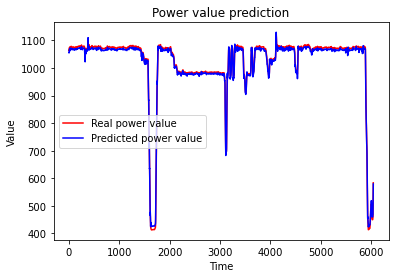

In [45]:
# WIZUALIZACJA WYNIKÓW
plt.plot(real_power_value, color = 'red', label = 'Real power value')
plt.plot(predicted_power_value, color = 'blue', label = 'Predicted power value')
plt.title('Power value prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()